# 뉴럴네트워크 다중분류
- mnist dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tlf
from tensorflow import keras

## 1. 데이터 준비

In [2]:
from keras.datasets import mnist

(X_train ,y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape) # color였으면 x,a,b,3이 나와야하지만 x,a,b,1인 형태라 흑백인 이미지인 것을 인지할 수 있음
# tensorflow는 높이, 너비, 채널 형식임
# torch는 채널, 높이, 너비 임

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
pd.Series(y_train).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [4]:
samples = np.random.randint(60000,size = 9)
samples

array([26070, 45760, 10352, 46161,    17, 25240, 57850,  2381, 36596])

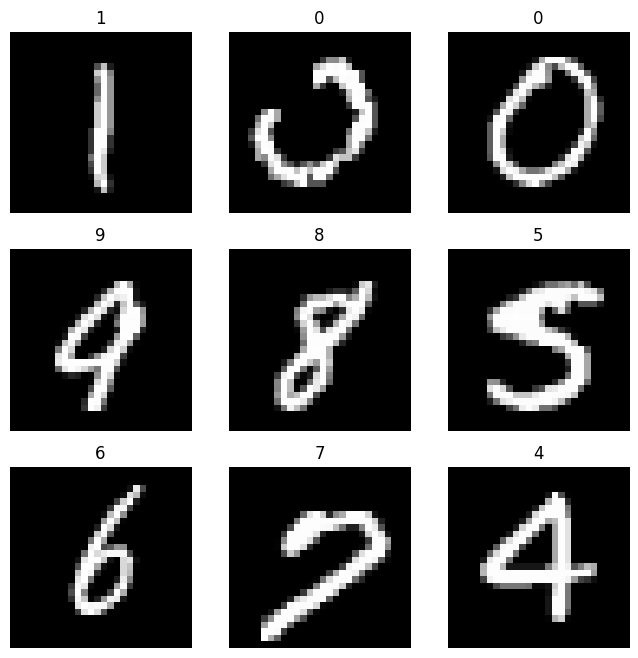

In [5]:
plt.figure(figsize = (8,8))
for i, idx in enumerate(samples):
  plt.subplot(3,3,1+i)
  plt.imshow(X_train[idx],cmap = 'gray') #colormap
  plt.axis('off')
  plt.title(y_train[idx])
plt.show()

### 검증 데이터 준비

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

### 정규화

- 이미지에서는 스탠다드 정규화보다 MinMax정규화를 주로 사용함.

In [7]:
X_train_s = X_train.astype('float32')/255. #.을 붙여서 다시 float형태로 바꿈
X_val_s = X_val.astype('float32')/255.

In [8]:
np.max(X_train_s) , np.min(X_val_s)

(1.0, 0.0)

### 레이블(타깃값) one-hot인코딩

In [9]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

y_train_o[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 데이터 직렬화
- Flatten

In [10]:
X_train_s = X_train_s.reshape(-1,28*28)
X_val_s = X_val_s.reshape(-1,28*28)

## 2. 모델 만들기

In [11]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units = 64,activation = 'relu',input_shape = ((28*28),)),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [14]:
EPOCHS = 10
BATCH_SIZE = 64

history = model.fit(
    X_train_s, y_train_o,
    batch_size =BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (X_val_s,y_val_o),
    verbose =1
)



Epoch 1/10
750/750 [==============================] - 8s 9ms/step - loss: 0.3899 - accuracy: 0.8924 - val_loss: 0.2240 - val_accuracy: 0.9349
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.1743 - accuracy: 0.9491 - val_loss: 0.1533 - val_accuracy: 0.9546
Epoch 3/10
750/750 [==============================] - 5s 6ms/step - loss: 0.1300 - accuracy: 0.9616 - val_loss: 0.1316 - val_accuracy: 0.9613
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.1056 - accuracy: 0.9687 - val_loss: 0.1166 - val_accuracy: 0.9649
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0886 - accuracy: 0.9730 - val_loss: 0.1203 - val_accuracy: 0.9624
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0753 - accuracy: 0.9767 - val_loss: 0.1035 - val_accuracy: 0.9684
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0635 - accuracy: 0.9805 - val_loss: 0.1066 - val_accuracy: 0.9668
Epoch 

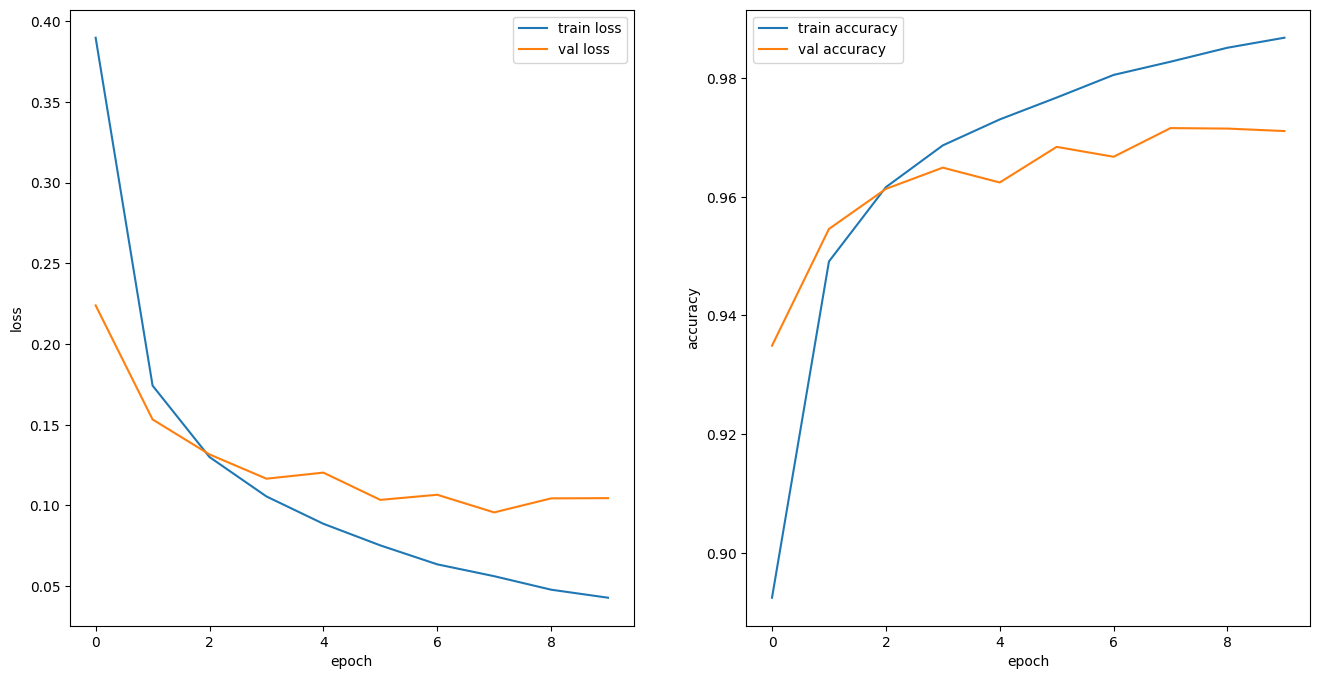

In [15]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

plot_history(history)

## 4. 평가

- 테스트 데이터 정리
  - 정규화
  - 차원 변경
  - 레이블 원핫 인코딩


In [16]:
X_test_s = X_test.astype('float32')/255.
X_test_s = X_test_s.reshape(-1,28*28)

y_test_o = to_categorical(y_test)

In [17]:
y_pred = model.predict(X_test_s)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[3.3533820e-07, 2.1313764e-09, 1.8556517e-06, 1.7602398e-06,
        1.3379593e-10, 2.1014978e-08, 2.2949052e-12, 9.9999005e-01,
        7.4730856e-08, 5.8796550e-06],
       [5.9096045e-08, 3.9909835e-05, 9.9995834e-01, 1.2146005e-06,
        3.6438790e-12, 1.5337587e-11, 4.0628962e-07, 7.8558673e-11,
        1.2773137e-07, 2.0726078e-19],
       [1.3018446e-06, 9.9626178e-01, 4.9416011e-04, 2.9720890e-05,
        5.9025620e-06, 1.0564485e-05, 5.4284645e-04, 2.2822660e-03,
        3.6467274e-04, 6.7968531e-06],
       [9.9996072e-01, 1.1231044e-09, 3.0692448e-05, 5.2031635e-10,
        2.0074623e-08, 2.9102033e-11, 8.5677093e-06, 2.2067306e-08,
        2.6298088e-13, 2.9292729e-10],
       [4.3768917e-08, 1.1380945e-09, 5.8546329e-10, 6.0769112e-11,
        9.9975753e-01, 2.1008820e-07, 2.1409322e-08, 2.2356417e-05,
        6.2497136e-09, 2.1982532e-04]], dtype=float32)

In [18]:
y_pred = np.argmax(y_pred,axis = 1)
y_pred[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [19]:
pd.Series(y_test)[:20]

0     7
1     2
2     1
3     0
4     4
5     1
6     4
7     9
8     5
9     9
10    0
11    6
12    9
13    0
14    1
15    5
16    9
17    7
18    3
19    4
dtype: uint8

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

def print_metrics(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred) # 정답값, 예측
  print(f'optimal_accuracy: {acc}')
  acc = recall_score(y_test,y_pred,average='macro') # 정답값, 예측
  print(f'recall_score: {acc}')
  acc = precision_score(y_test,y_pred,average='macro') # 정답값, 예측
  print(f'precision_score: {acc}')
  acc = f1_score(y_test,y_pred,average='macro') # 정답값, 예측
  print(f'precision_score: {acc}')

print_metrics(y_test,y_pred)

optimal_accuracy: 0.9718
recall_score: 0.9714991693853164
precision_score: 0.9719386994000635
precision_score: 0.9715957535555916


In [21]:
wrong_idx = np.where(y_pred != y_test)[0]
rdm_wrong_idx = np.random.choice(wrong_idx,size = 9)
rdm_wrong_idx

array([2333, 2769, 6783, 3902, 6783, 4823, 5457, 3821, 8272])

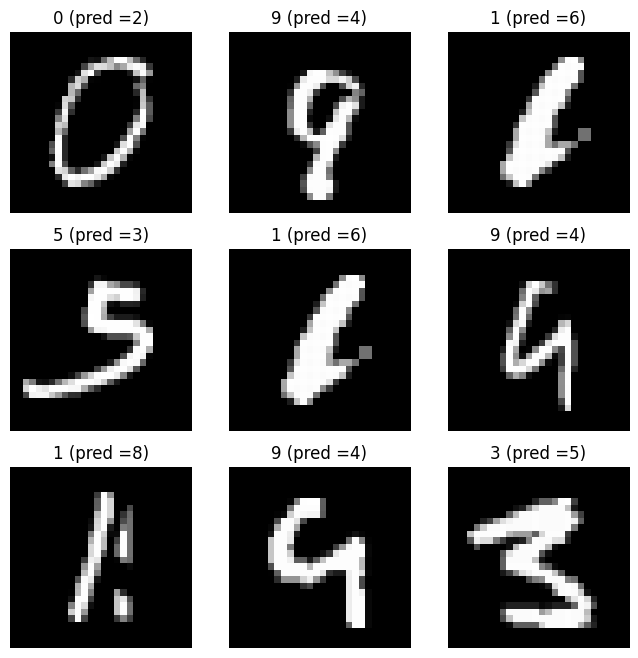

In [22]:
plt.figure(figsize = (8,8))
for i, idx in enumerate(rdm_wrong_idx):
  plt.subplot(3,3,1+i)
  plt.imshow(X_test[idx],cmap = 'gray') #colormap
  plt.axis('off')
  plt.title(f'{y_test[idx]} (pred ={y_pred[idx]})')
plt.show()

## 6. 모델 저장
- 케라스 모델형식으로 저장

In [23]:
model.save('nn-mnist-28x28-97.keras')

- 텐서플로우 모델형식으로 저장

In [24]:
model.save('my-model')

## 모델 로딩

In [25]:
loaded_model = keras.models.load_model('nn-mnist-28x28-97.keras')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
